<a href="https://colab.research.google.com/github/MattLazcano/Team-2-code/blob/main/Team_2_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install deepxde

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.2/194.2 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 6.1 MB/s eta 0:00:00


In [2]:
import deepxde as dde

No backend selected.
Finding available backend...


Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.
Instructions for updating:
non-resource variables are not supported in the long term


Found tensorflow.compat.v1
Setting the default backend to "tensorflow.compat.v1". You can change it in the ~/.deepxde/config.json file or export the DDE_BACKEND environment variable. Valid options are: tensorflow.compat.v1, tensorflow, pytorch, jax, paddle (all lowercase)


Training on current eta value: 0.1
Compiling model...
Building feed-forward neural network...
'build' took 0.090194 s

'compile' took 8.632340 s

Training model...

Step      Train loss                                                                                                                                                                                                                                                                                                                          Test loss                                                                                                                                                                                                                                                                                                                           Test metric
0         [2.94e-02, 8.43e-02, 1.31e-02, 1.05e-02, 2.29e-01, 1.50e-01, 7.17e-02, 1.05e-01, 1.81e-02, 3.46e-02, 2.11e-01, 6.83e-02, 5.60e-01, 1.21e-01, 6.81e-03, 1.85

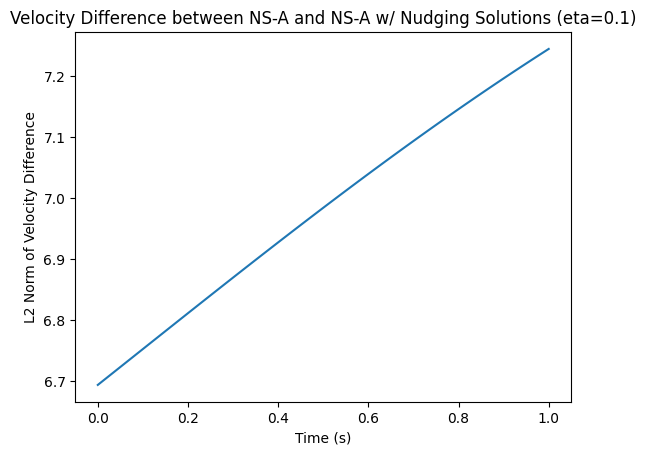

Training on current eta value: 10
Compiling model...
Building feed-forward neural network...
'build' took 0.076188 s

'compile' took 9.093689 s

Training model...

Step      Train loss                                                                                                                                                                                                                                                                                                                          Test loss                                                                                                                                                                                                                                                                                                                           Test metric
0         [2.97e-02, 8.35e-02, 1.31e-02, 1.06e-02, 2.28e-01, 1.50e-01, 7.16e-02, 2.79e+00, 1.79e-02, 3.44e-02, 2.11e-01, 6.84e-02, 5.62e-01, 1.21e-01, 6.39e-03, 1.88e

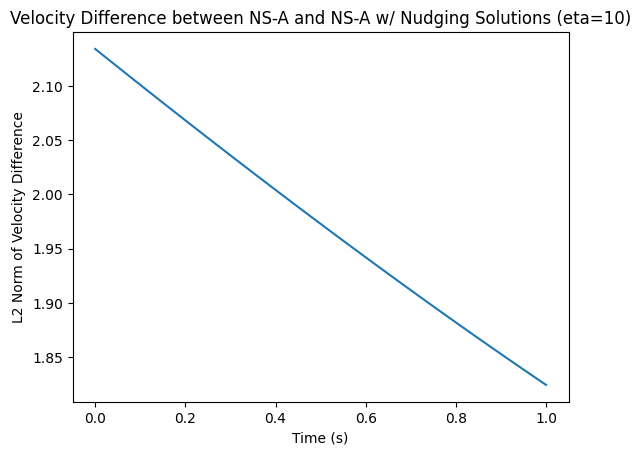

Training on current eta value: 30
Compiling model...
Building feed-forward neural network...
'build' took 0.065888 s

'compile' took 7.880976 s

Training model...

Step      Train loss                                                                                                                                                                                                                                                                                                                          Test loss                                                                                                                                                                                                                                                                                                                           Test metric
0         [2.97e-02, 8.37e-02, 1.31e-02, 1.05e-02, 2.30e-01, 1.49e-01, 7.16e-02, 2.38e+01, 1.79e-02, 3.43e-02, 2.11e-01, 6.83e-02, 5.63e-01, 1.22e-01, 6.22e-03, 2.03e

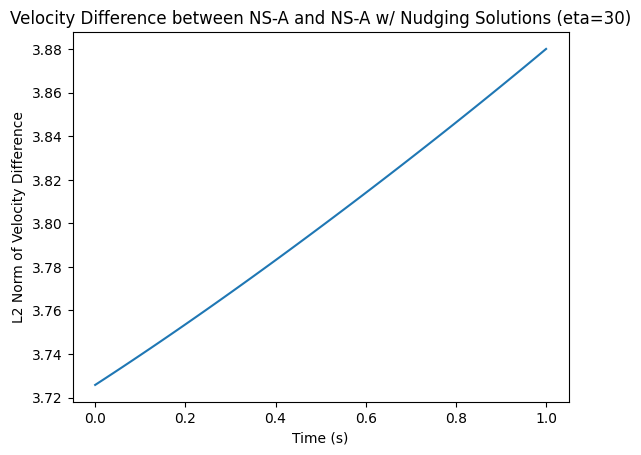

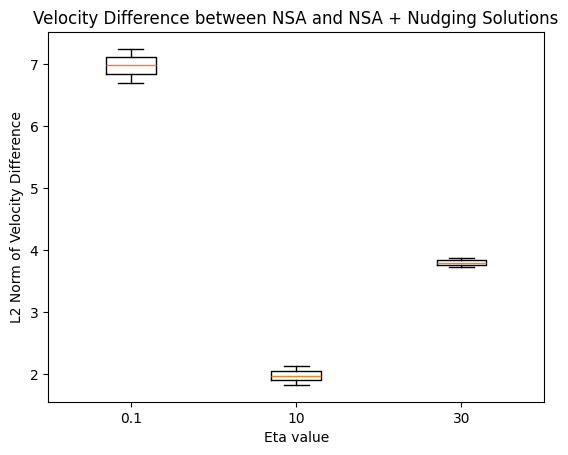

In [3]:
from functools import partial
import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt

# os.environ["CUDA_VISIBLE_DEVICES"] = "0"

# double check DDE parts
# only 1 graph
# at the end of the code, try to generate a graph which kind of produces the difference
# across alpha values
# x-axis: alpha values
# y: L2 difference

# -----------------------------------
# These are the values you need to change
# -----------------------------------
alpha = 0.5
nu = 0.1
rho = 1.0
mu = rho * nu
etaValues = [0.1, 10, 30]
# -----------------------------------

# Navier-Stokes PDE

'''
def ns_pde(x, u):

    # ns_pde takes:
      # x: input coordinate tensor [x, y, z, t]
      # u: output velocity tensor [u_vel, v_vel, w_vel, p]
    # and returns:
      # momentum_x: momentum on x-axis @ input point x
      # momentum_y: momentum on y-axis @ input point x
      # momentum_z: momentum on z-axis @ input point x
      # continuity: divergence = 0 condition for NS

    u_vel, v_vel, w_vel, p = u[:, 0:1], u[:, 1:2], u[:, 2:3], u[:, 3:4]

    # external forces on system (gravity, etc)
    f_x, f_y, f_z = 0.0, 0.0, 0.0

    # First Derivatives
    # Jacobian takes:
      # u: output tensor [u_vel, v_vel, w_vel, p]
      # x: input tensor [x, y, z, t]
      # i: index of u to use (u[i])
      # j: index of x to use (x[j])
    # and returns:
      # (partial u[i]) / (partial x[j])
    u_vel_t = dde.grad.jacobian(u, x, i=0, j=3)  # du/dt
    u_vel_x = dde.grad.jacobian(u, x, i=0, j=0)  # du/dx
    u_vel_y = dde.grad.jacobian(u, x, i=0, j=1)  # du/dy
    u_vel_z = dde.grad.jacobian(u, x, i=0, j=2)  # du/dz

    v_vel_t = dde.grad.jacobian(u, x, i=1, j=3)  # dv/dt
    v_vel_x = dde.grad.jacobian(u, x, i=1, j=0)  # dv/dx
    v_vel_y = dde.grad.jacobian(u, x, i=1, j=1)  # dv/dy
    v_vel_z = dde.grad.jacobian(u, x, i=1, j=2)  # dv/dz

    w_vel_t = dde.grad.jacobian(u, x, i=2, j=3)  # dw/dt
    w_vel_x = dde.grad.jacobian(u, x, i=2, j=0)  # dw/dx
    w_vel_y = dde.grad.jacobian(u, x, i=2, j=1)  # dw/dy
    w_vel_z = dde.grad.jacobian(u, x, i=2, j=2)  # dw/dz

    p_x = dde.grad.jacobian(u, x, i=3, j=0)  # dp/dx
    p_y = dde.grad.jacobian(u, x, i=3, j=1)  # dp/dy
    p_z = dde.grad.jacobian(u, x, i=3, j=2)  # dp/dz

    # Second Derivatives
    # Hessian takes:
      # u: output tensor [u_vel, v_vel, w_vel, p]
      # x: input tensor [x, y, z, t]
      # component: index of u[] to differentiate (u[component])
      # i: index of x to differentiate w.r.t 1st (x[i])
      # j: index of x to differentiate w.r.t 2nd (x[j])
    # and returns:
      # (∂^2 u[component]) / (∂x[i] ∂x[j])
    u_vel_xx = dde.grad.hessian(u, x, component=0, i=0, j=0)  # d²u/dx²
    u_vel_yy = dde.grad.hessian(u, x, component=0, i=1, j=1)  # d²u/dy²
    u_vel_zz = dde.grad.hessian(u, x, component=0, i=2, j=2)  # d²u/dz²

    v_vel_xx = dde.grad.hessian(u, x, component=1, i=0, j=0)  # d²v/dx²
    v_vel_yy = dde.grad.hessian(u, x, component=1, i=1, j=1)  # d²v/dy²
    v_vel_zz = dde.grad.hessian(u, x, component=1, i=2, j=2)  # d²v/dz²

    w_vel_xx = dde.grad.hessian(u, x, component=2, i=0, j=0)  # d²w/dx²
    w_vel_yy = dde.grad.hessian(u, x, component=2, i=1, j=1)  # d²w/dy²
    w_vel_zz = dde.grad.hessian(u, x, component=2, i=2, j=2)  # d²w/dz²

    # (Should be of the form ∂u/∂t + (u⋅∇)u + ∇p - νΔu - f = 0)
    # NS-x
    momentum_x = (
        rho * (u_vel_t + (u_vel * u_vel_x) + (v_vel * u_vel_y) + (w_vel * u_vel_z)) # ∂u/∂t + ((u⋅∇)u)_x
        - rho * f_x + p_x                                                           # -f_x, +∇p_x
        - mu * (u_vel_xx + u_vel_yy + u_vel_zz)                                     # -νΔu_x
    )

    # NS-y
    momentum_y = (
        rho * (v_vel_t + (u_vel * v_vel_x) + (v_vel * v_vel_y) + (w_vel * v_vel_z)) # ∂u/∂t + ((u⋅∇)u)_y
        - rho * f_y + p_y                                                           # -f_y, +∇p_y
        - mu * (v_vel_xx + v_vel_yy + v_vel_zz)                                     # -νΔu_y
    )

    # NS-z
    momentum_z = (
        rho * (w_vel_t + (u_vel * w_vel_x) + (v_vel * w_vel_y) + (w_vel * w_vel_z)) # ∂u/∂t + ((u⋅∇)u)_y
        - rho * f_z + p_z                                                           # -f_z, +∇p_z
        - mu * (w_vel_xx + w_vel_yy + w_vel_zz)                                     # -νΔu_z
    )

    # continuity (∇⋅u = 0)
    continuity = u_vel_x + v_vel_y + w_vel_z

    # We return these to have the NN learn to set them all = 0
    # for arbitrary input values, thus adhering to the NS equations2
    return [momentum_x, momentum_y, momentum_z, continuity]
'''

def ns_alpha_pde(x, y):

    # ns_alpha_pde function takes:
      # x: input tensor [x, y, z, t]
      # y: output tensor [u, v, w, u_bar, v_bar, w_bar, q]
    # and returns
      # f1: momentum in x-direction
      # f2: momentum in y-direction
      # f3: momentum in z-direction
      # f4: momentum in x-direction with nudging
      # f5: momentum in y-direction with nudging
      # f6: momentum in z-direction with nudging
      # incompressibility: Divergence should
      # relation_u: how u_bar relates to u
      # relation_v: how v_bar relates to v
      # relation_w: how w_bar relates to w
      # relation_a: how a_bar relates to a
      # relation_b: how b_bar relates to b
      # relation_c: how c_bar relates to c
    # These return values are what the NN is trying to minimize the loss of


    #external forces on x, y, z axis
    f_x = 0
    f_y = 0
    f_z = 0

    # Components of our output (y)
    # Each component is a column vector ([N,1])
    u, v, w, u_bar, v_bar, w_bar, q = y[:, 0:1], y[:, 1:2], y[:, 2:3], y[:, 3:4], y[:, 4:5], y[:, 5:6], y[:, 6:7]

    a, b, c, a_bar, b_bar, c_bar = y[:, 7:8], y[:, 8:9], y[:, 9:10], y[:, 10:11], y[:, 11:12], y[:, 12:13]

    # First-order derivatives
    # Jacobian takes:
      # y: output tensor [u, v, w, u_bar, v_bar, w_bar, q, a, b, c, a_bar, b_bar, c_bar]
      # x: input tensor [x, y, z, t]
      # i: index of y to use (y[i])
      # j: index of x to use (x[j])
    # and returns:
      # (∂y[i]) / (∂x[j])

    du_t = dde.grad.jacobian(y, x, i=0, j=3)  # ∂u/∂t
    dv_t = dde.grad.jacobian(y, x, i=1, j=3)  # ∂v/∂t
    dw_t = dde.grad.jacobian(y, x, i=2, j=3)  # ∂w/∂t

    du_x = dde.grad.jacobian(y, x, i=0, j=0)  # ∂u/∂x
    du_y = dde.grad.jacobian(y, x, i=0, j=1)  # ∂u/∂y
    du_z = dde.grad.jacobian(y, x, i=0, j=2)  # ∂u/∂z

    dv_x = dde.grad.jacobian(y, x, i=1, j=0)  # ∂v/∂x
    dv_y = dde.grad.jacobian(y, x, i=1, j=1)  # ∂v/∂y
    dv_z = dde.grad.jacobian(y, x, i=1, j=2)  # ∂v/∂z

    dw_x = dde.grad.jacobian(y, x, i=2, j=0)  # ∂w/∂x
    dw_y = dde.grad.jacobian(y, x, i=2, j=1)  # ∂w/∂y
    dw_z = dde.grad.jacobian(y, x, i=2, j=2)  # ∂w/∂z
    #################################################

    du_bar_x = dde.grad.jacobian(y, x, i=3, j=0)  # ∂u_bar/∂x
    du_bar_y = dde.grad.jacobian(y, x, i=3, j=1)  # ∂u_bar/∂y
    du_bar_z = dde.grad.jacobian(y, x, i=3, j=2)  # ∂u_bar/∂z
    du_bar_t = dde.grad.jacobian(y, x, i=3, j=3)  # ∂u_bar/∂t

    dv_bar_x = dde.grad.jacobian(y, x, i=4, j=0)  # ∂v_bar/∂x
    dv_bar_y = dde.grad.jacobian(y, x, i=4, j=1)  # ∂v_bar/∂y
    dv_bar_z = dde.grad.jacobian(y, x, i=4, j=2)  # ∂v_bar/∂z
    dv_bar_t = dde.grad.jacobian(y, x, i=4, j=3)  # ∂u_bar/∂t

    dw_bar_x = dde.grad.jacobian(y, x, i=5, j=0)  # ∂w_bar/∂x
    dw_bar_y = dde.grad.jacobian(y, x, i=5, j=1)  # ∂w_bar/∂y
    dw_bar_z = dde.grad.jacobian(y, x, i=5, j=2)  # ∂w_bar/∂z
    dw_bar_t = dde.grad.jacobian(y, x, i=5, j=3)  # ∂u_bar/∂t

    # (for the Pressure Gradient (nabla p))
    dq_x = dde.grad.jacobian(y, x, i=6, j=0)  # ∂q/∂x
    dq_y = dde.grad.jacobian(y, x, i=6, j=1)  # ∂q/∂y
    dq_z = dde.grad.jacobian(y, x, i=6, j=2)  # ∂q/∂z



    ############ f4, f5, f6 DEFINITIONS #############
    da_t = dde.grad.jacobian(y, x, i=7, j=3)  # ∂a/∂t
    db_t = dde.grad.jacobian(y, x, i=8, j=3)  # ∂b/∂t
    dc_t = dde.grad.jacobian(y, x, i=9, j=3)  # ∂c/∂t

    da_x = dde.grad.jacobian(y, x, i=7, j=0)  # ∂u/∂x
    da_y = dde.grad.jacobian(y, x, i=7, j=1)  # ∂u/∂y
    da_z = dde.grad.jacobian(y, x, i=7, j=2)  # ∂u/∂z

    db_x = dde.grad.jacobian(y, x, i=8, j=0)  # ∂v/∂x
    db_y = dde.grad.jacobian(y, x, i=8, j=1)  # ∂v/∂y
    db_z = dde.grad.jacobian(y, x, i=8, j=2)  # ∂v/∂z

    dc_x = dde.grad.jacobian(y, x, i=9, j=0)  # ∂w/∂x
    dc_y = dde.grad.jacobian(y, x, i=9, j=1)  # ∂w/∂y
    dc_z = dde.grad.jacobian(y, x, i=9, j=2)  # ∂w/∂z

    da_bar_x = dde.grad.jacobian(y, x, i=10, j=0)  # ∂a_bar/∂x
    da_bar_y = dde.grad.jacobian(y, x, i=10, j=1)  # ∂a_bar/∂y
    da_bar_z = dde.grad.jacobian(y, x, i=10, j=2)  # ∂a_bar/∂z
    da_bar_t = dde.grad.jacobian(y, x, i=10, j=3)  # ∂a_bar/∂t

    db_bar_x = dde.grad.jacobian(y, x, i=11, j=0)  # ∂b_bar/∂x
    db_bar_y = dde.grad.jacobian(y, x, i=11, j=1)  # ∂b_bar/∂y
    db_bar_z = dde.grad.jacobian(y, x, i=11, j=2)  # ∂b_bar/∂z
    db_bar_t = dde.grad.jacobian(y, x, i=11, j=3)  # ∂b_bar/∂t

    dc_bar_x = dde.grad.jacobian(y, x, i=12, j=0)  # ∂c_bar/∂x
    dc_bar_y = dde.grad.jacobian(y, x, i=12, j=1)  # ∂c_bar/∂y
    dc_bar_z = dde.grad.jacobian(y, x, i=12, j=2)  # ∂c_bar/∂z
    dc_bar_t = dde.grad.jacobian(y, x, i=12, j=3)  # ∂c_bar/∂t
    #################################################

    # Second-order derivatives
    # Hessian takes:
      # y: output tensor [u, v, w, u_bar, v_bar, w_bar, q, a, b, c, a_bar, b_bar, c_bar]
      # x: input tensor [x, y, z, t]
      # component: index of y[] to differentiate (y[component])
      # i: index of x to differentiate w.r.t 1st (x[i])
      # j: index of x to differentiate w.r.t 2nd (x[j])
    # and returns:
      # (∂^2 y[component]) / (∂x[i] ∂x[j])

    du_xx = dde.grad.hessian(y, x, component=0, i=0, j=0) # ∂u/∂x^2
    du_yy = dde.grad.hessian(y, x, component=0, i=1, j=1) # ∂u/∂y^2
    du_zz = dde.grad.hessian(y, x, component=0, i=2, j=2) # ∂u/∂z^2

    dv_xx = dde.grad.hessian(y, x, component=1, i=0, j=0) # ∂v/∂x^2
    dv_yy = dde.grad.hessian(y, x, component=1, i=1, j=1) # ∂v/∂y^2
    dv_zz = dde.grad.hessian(y, x, component=1, i=2, j=2) # ∂v/∂z^2

    dw_xx = dde.grad.hessian(y, x, component=2, i=0, j=0) # ∂w/∂x^2
    dw_yy = dde.grad.hessian(y, x, component=2, i=1, j=1) # ∂w/∂y^2
    dw_zz = dde.grad.hessian(y, x, component=2, i=2, j=2) # ∂w/∂z^2

    du_bar_xx = dde.grad.hessian(y, x, component=3, i=0, j=0) # ∂u_bar/∂x^2
    du_bar_yy = dde.grad.hessian(y, x, component=3, i=1, j=1) # ∂u_bar/∂y^2
    du_bar_zz = dde.grad.hessian(y, x, component=3, i=2, j=2) # ∂u_bar/∂z^2

    dv_bar_xx = dde.grad.hessian(y, x, component=4, i=0, j=0) # ∂v_bar/∂x^2
    dv_bar_yy = dde.grad.hessian(y, x, component=4, i=1, j=1) # ∂v_bar/∂y^2
    dv_bar_zz = dde.grad.hessian(y, x, component=4, i=2, j=2) # ∂v_bar/∂z^2

    dw_bar_xx = dde.grad.hessian(y, x, component=5, i=0, j=0) # ∂w_bar/∂x^2
    dw_bar_yy = dde.grad.hessian(y, x, component=5, i=1, j=1) # ∂w_bar/∂y^2
    dw_bar_zz = dde.grad.hessian(y, x, component=5, i=2, j=2) # ∂w_bar/∂z^2

    #################################################

    da_xx = dde.grad.hessian(y, x, component=7, i=0, j=0) # ∂u/∂x^2
    da_yy = dde.grad.hessian(y, x, component=7, i=1, j=1) # ∂u/∂y^2
    da_zz = dde.grad.hessian(y, x, component=7, i=2, j=2) # ∂u/∂z^2

    db_xx = dde.grad.hessian(y, x, component=8, i=0, j=0) # ∂v/∂x^2
    db_yy = dde.grad.hessian(y, x, component=8, i=1, j=1) # ∂v/∂y^2
    db_zz = dde.grad.hessian(y, x, component=8, i=2, j=2) # ∂v/∂z^2

    dc_xx = dde.grad.hessian(y, x, component=9, i=0, j=0) # ∂w/∂x^2
    dc_yy = dde.grad.hessian(y, x, component=9, i=1, j=1) # ∂w/∂y^2
    dc_zz = dde.grad.hessian(y, x, component=9, i=2, j=2) # ∂w/∂z^2

    da_bar_xx = dde.grad.hessian(y, x, component=10, i=0, j=0) # ∂u_bar/∂x^2
    da_bar_yy = dde.grad.hessian(y, x, component=10, i=1, j=1) # ∂u_bar/∂y^2
    da_bar_zz = dde.grad.hessian(y, x, component=10, i=2, j=2) # ∂u_bar/∂z^2

    db_bar_xx = dde.grad.hessian(y, x, component=11, i=0, j=0) # ∂v_bar/∂x^2
    db_bar_yy = dde.grad.hessian(y, x, component=11, i=1, j=1) # ∂v_bar/∂y^2
    db_bar_zz = dde.grad.hessian(y, x, component=11, i=2, j=2) # ∂v_bar/∂z^2

    dc_bar_xx = dde.grad.hessian(y, x, component=12, i=0, j=0) # ∂w_bar/∂x^2
    dc_bar_yy = dde.grad.hessian(y, x, component=12, i=1, j=1) # ∂w_bar/∂y^2
    dc_bar_zz = dde.grad.hessian(y, x, component=12, i=2, j=2) # ∂w_bar/∂z^2

    # Laplacians
    # (used in Diffusion (nu Δ v))
    laplacian_u = du_xx + du_yy + du_zz
    laplacian_v = dv_xx + dv_yy + dv_zz
    laplacian_w = dw_xx + dw_yy + dw_zz

    laplacian_u_bar = du_bar_xx + du_bar_yy + du_bar_zz
    laplacian_v_bar = dv_bar_xx + dv_bar_yy + dv_bar_zz
    laplacian_w_bar = dw_bar_xx + dw_bar_yy + dw_bar_zz

    # Laplacians for nudging terms
    laplacian_a = da_xx + da_yy + da_zz
    laplacian_b = db_xx + db_yy + db_zz
    laplacian_c = dc_xx + dc_yy + dc_zz

    laplacian_a_bar = da_bar_xx + da_bar_yy + da_bar_zz
    laplacian_b_bar = db_bar_xx + db_bar_yy + db_bar_zz
    laplacian_c_bar = dc_bar_xx + dc_bar_yy + dc_bar_zz

    # Relationship between filtered and actual velocities
    # (v = (1-α^2 Δ)u)
    # this forces our model to learn how to be constrained to the proper
    # relationship between our velocity field and our filtered velocity field

    ### INVERTING RELATIONSHIP BETWEEN u and V ###########
    #relation_u = u_bar - alpha**2 * laplacian_u_bar - u #
    #relation_v = v_bar - alpha**2 * laplacian_v_bar - v #
    #relation_w = w_bar - alpha**2 * laplacian_w_bar - w #
    ######################################################

    relation_u = u - alpha**2 * laplacian_u - u_bar
    relation_v = v - alpha**2 * laplacian_v - v_bar
    relation_w = w - alpha**2 * laplacian_w - w_bar

    relation_a = a - alpha**2 * laplacian_a - a_bar
    relation_b = b - alpha**2 * laplacian_b - b_bar
    relation_c = c - alpha**2 * laplacian_c - c_bar

    # Momentum equations
    # (of the form ∂u/∂t - ū×(∇×ū) + ∇q - νΔu - f = 0)

    # NOTE: Viscous term is on our unfiltered velocity field u, NOT the filtered v
    # this SHOULD be fine since we're also enforcing the filtering constraint
    # v = (1 − α^2 Δ)u

    # UPDATED TO MODEL u×(∇×ū) INSTEAD OF ū×(∇×ū)
    f1 = (
        du_bar_t                                                   # ∂u_bar/∂t (unfiltered)
        - (v * (dv_bar_x - du_bar_y) - w * (du_bar_z - dw_bar_x)) # x-component of u × (∇ × v)
        + dq_x                                                    # pressure gradient (∂p/∂x)
        - mu * laplacian_u_bar                                    # viscosity term on u: -mu Δv (changed 7/5)
        - f_x                                                     # external force in x-direction
      )

    f2 = (
        dv_bar_t                                                  # ∂v_bar/∂t (unfiltered)
        - (w * (dw_bar_y - dv_bar_z) - u * (dv_bar_x - du_bar_y)) # y-component of u × (∇ × v)
        + dq_y                                                    # pressure gradient (∂p/∂y)
        - mu * laplacian_v_bar                                    # viscosity term on v: -mu Δv (changed 7/5)
        - f_y                                                     # external force in y-direction

    )
    f3 = (
        dw_bar_t                                                  # ∂w_bar/∂t (unfiltered)
        - (u * (du_bar_z - dw_bar_x) - v * (dw_bar_y - dv_bar_z)) # z-component of u × (∇ × v)
        + dq_z                                                    # pressure gradient (∂p/∂y)
        - mu * laplacian_w_bar                                    # Viscosity term on w: -mu Δv (changed 7/5)
        - f_z                                                     # external force in z-direction

    )
    f4 = (
        da_bar_t                                                   # ∂a_bar/∂t (unfiltered)
        - (b * (db_bar_x - da_bar_y) - c * (da_bar_z - dc_bar_x)) # x-component of u × (∇ × v)
        + dq_x                                                    # pressure gradient (∂p/∂x)
        - mu * laplacian_a_bar                                    # viscosity term on u: -mu Δv (changed 7/5)
        - f_x                                                     # external force in x-direction
        - eta * (a - u)                                          # nudging term -η(v1-u1)
      )

    f5 = (
        db_bar_t                                                  # ∂v_bar/∂t (unfiltered)
        - (c * (dc_bar_y - db_bar_z) - a * (db_bar_x - da_bar_y)) # y-component of u × (∇ × v)
        + dq_y                                                    # pressure gradient (∂p/∂y)
        - mu * laplacian_b_bar                                    # viscosity term on v: -mu Δv (changed 7/5)
        - f_y                                                     # external force in y-direction

    )
    f6 = (
        dc_bar_t                                                  # ∂w_bar/∂t (unfiltered)
        - (a * (da_bar_z - dc_bar_x) - b * (dc_bar_y - db_bar_z)) # z-component of u × (∇ × v)
        + dq_z                                                    # pressure gradient (∂p/∂y)
        - mu * laplacian_c_bar                                    # Viscosity term on w: -mu Δv (changed 7/5)
        - f_z                                                     # external force in z-direction
    )
    # Incompressibility condition for bar velocities
    # Nabla * u = 0 (CHANGED FROM Nabla * v ON 7/5)

    incompressibility = du_x + dv_y + dw_z

    incompress_nudged = da_x + db_y + dc_z

    # Tell NN to minimize: 3 momentum residuals (the filtered equation),
	  # the incompressibility condition,
	  # & 3 filtering constraint residuals
    return [f1, f2, f3, incompressibility, relation_u, relation_v, relation_w, f4, f5, f6, incompress_nudged, relation_a, relation_b, relation_c]


def ic_u(x):
    num_points = x.shape[0]
    return np.full((num_points, 1), 0.0)  # u at t=0

def ic_v(x):
    num_points = x.shape[0]
    return np.full((num_points, 1), 0.0)  # v at t=0

def ic_w(x):
    num_points = x.shape[0]
    return np.full((num_points, 1), 0.0)  # w at t=0

def ic_a(x):
    num_points = x.shape[0]
    return np.full((num_points, 1), 0.5)  # a (nudging) at t=0

def ic_b(x):
    num_points = x.shape[0]
    return np.full((num_points, 1), 0.5)  # b (nudging) at t=0

def ic_c(x):
    num_points = x.shape[0]
    return np.full((num_points, 1), 0.5)  # c (nudging) at t=0

# Create grid
#going from -1 to 1 split into 10 intervals
x, y, z = np.meshgrid(
    np.linspace(-1, 1, 10),
    np.linspace(-1, 1, 10),
    np.linspace(-1, 1, 10)
)
X = np.vstack((np.ravel(x), np.ravel(y), np.ravel(z))).T #makes 3D grid into a 2D array and each row is a point in 3D space
t_0 = np.zeros((X.shape[0], 1))  # Initial time = 0


# Geometry and time domain
geom = dde.geometry.Cuboid([-1, -1, -1], [1, 1, 1])
timedomain = dde.geometry.TimeDomain(0, 1)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

def periodic_bc(x, on_boundary):
    x_spatial = x[:3]  # Just x, y, z (exclude time)
    return on_boundary and (
        np.isclose(x_spatial[0], -1) or np.isclose(x_spatial[0], 1) or
        np.isclose(x_spatial[1], -1) or np.isclose(x_spatial[1], 1) or
        np.isclose(x_spatial[2], -1) or np.isclose(x_spatial[2], 1)
    )

# Create periodic boundary conditions for velocity components
bc_u = dde.icbc.PeriodicBC(geomtime, 0, periodic_bc, component=0)  # u
bc_v = dde.icbc.PeriodicBC(geomtime, 1, periodic_bc, component=1)  # v
bc_w = dde.icbc.PeriodicBC(geomtime, 2, periodic_bc, component=2)  # w

# Create periodic boundary conditions for filtered velocity components
bc_u_bar = dde.icbc.PeriodicBC(geomtime, 0, periodic_bc, component=3)  # u_bar
bc_v_bar = dde.icbc.PeriodicBC(geomtime, 1, periodic_bc, component=4)  # v_bar
bc_w_bar = dde.icbc.PeriodicBC(geomtime, 2, periodic_bc, component=5)  # w_bar

# For Nudging Model:
# Create periodic boundary conditions for velocity components
bc_a = dde.icbc.PeriodicBC(geomtime, 0, periodic_bc, component=7)  # a
bc_b = dde.icbc.PeriodicBC(geomtime, 1, periodic_bc, component=8)  # b
bc_c = dde.icbc.PeriodicBC(geomtime, 2, periodic_bc, component=9)  # c

# Create periodic boundary conditions for filtered velocity components
bc_a_bar = dde.icbc.PeriodicBC(geomtime, 0, periodic_bc, component=10)  # a_bar
bc_b_bar = dde.icbc.PeriodicBC(geomtime, 1, periodic_bc, component=11)  # b_bar
bc_c_bar = dde.icbc.PeriodicBC(geomtime, 2, periodic_bc, component=12)  # c_bar

ic_u = dde.icbc.IC(geomtime, ic_u, lambda _, on_initial: on_initial)
ic_v = dde.icbc.IC(geomtime, ic_v, lambda _, on_initial: on_initial)
ic_w = dde.icbc.IC(geomtime, ic_w, lambda _, on_initial: on_initial)

ic_a = dde.icbc.IC(geomtime, ic_a, lambda _, on_initial: on_initial)
ic_b = dde.icbc.IC(geomtime, ic_b, lambda _, on_initial: on_initial)
ic_c = dde.icbc.IC(geomtime, ic_c, lambda _, on_initial: on_initial)

eta_array = []
eta_diffarray = []

for eta in etaValues:
    print(f"Training on current eta value: {eta}")

    # Define training data:
    data_nsa = dde.data.TimePDE(
        geomtime,
        ns_alpha_pde,  # Make sure you have defined this!
        [bc_u, bc_v, bc_w, bc_u_bar, bc_v_bar, bc_w_bar,
       bc_a, bc_b, bc_c, bc_a_bar, bc_b_bar, bc_c_bar, ic_u, ic_v, ic_w, ic_a, ic_b, ic_c],
        num_domain=500,
        num_boundary=50,
        num_initial=50
    )

    net_nsa = dde.nn.FNN([4] + [50] * 3 + [14], "tanh", "Glorot normal")
    model_nsa = dde.Model(data_nsa, net_nsa)
    model_nsa.compile("adam", lr=1e-3)
    losshistory, train_state = model_nsa.train(iterations=10000)

    def compute_l2_norm(u_diff, v_diff, w_diff):
        return np.sqrt(np.sum(u_diff**2 + v_diff**2 + w_diff**2))

    plotarr = []
    diffarray = []

    for t in np.linspace(0, 1, 50):
        t_val = np.ones((X.shape[0], 1)) * t
        output = model_nsa.predict(np.hstack((X, t_val)))

        u, v, w = output[:, 0], output[:, 1], output[:, 2]
        a, b, c = output[:, 7], output[:, 8], output[:, 9]

        u_diff = a - u
        v_diff = b - v
        w_diff = c - w

        l2_norm = compute_l2_norm(u_diff, v_diff, w_diff)
        plotarr.append(t)
        diffarray.append(l2_norm)

    # Plot the L2 norm of velocity differences over time
    plt.plot(plotarr, diffarray)
    plt.xlabel("Time (s)")
    plt.ylabel("L2 Norm of Velocity Difference")
    plt.title(f"Velocity Difference between NS-A and NS-A w/ Nudging Solutions (eta={eta:.5g})")
    plt.show()

    #save current diffarr to array for graph of several a values
    eta_array.append(eta)
    eta_diffarray.append(diffarray)

# Box plot across all eta values
plt.figure()
plt.boxplot(eta_diffarray)
plt.xticks(
    ticks=np.arange(1, len(eta_array) + 1),
    labels=[f"{a:.5g}" for a in eta_array]
)
plt.xlabel("Eta value")
plt.ylabel("L2 Norm of Velocity Difference")
plt.title("Velocity Difference between NSA and NSA + Nudging Solutions")
plt.show()